In [1]:
#Dependencies
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

# Alcohol Sales vs High School Dropouts

In [2]:
 file = '../Dropout_data/Dropouts2019-2020_cleaned.csv'

In [3]:
#read in the csv
old_df = pd.read_csv(file)
old_df.head()

,County,AUN,LEA,School Code,School,Oct 1 Enrollment Grades 7-12,Male Dropouts,Female Dropouts,Dropouts,Dropout Rate
0,Adams,112011103.0,Bermudian Springs SD,3.0,Bermudian Springs HS,597,2,3,5,0.84%
1,Adams,112011103.0,Bermudian Springs SD,6921.0,Bermudian Springs MS,323,0,0,0,0.00%
2,Adams,112011603.0,Conewago Valley SD,9999.0,Conewago Valley SD,12,1,0,1,8.33%
3,Adams,112011603.0,Conewago Valley SD,6898.0,New Oxford MS,634,0,0,0,0.00%
4,Adams,112011603.0,Conewago Valley SD,17.0,New Oxford SHS,"1,227",13,10,23,1.87%


In [4]:
#select only data that shows dropouts in total and as a rate
clean_df = old_df[['County','Dropouts','Dropout Rate']].copy()
clean_df.head(20)
# clean_df.dtypes

,County,Dropouts,Dropout Rate
0,Adams,5,0.84%
1,Adams,0,0.00%
2,Adams,1,8.33%
3,Adams,0,0.00%
4,Adams,23,1.87%
5,Adams,3,0.93%
6,Adams,0,0.00%
7,Adams,0,0.00%
8,Adams,8,0.70%
9,Adams,0,0.00%


In [5]:
#replace percent sign from dropout rate with nothing
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].str.replace('%','')
clean_df.head()

,County,Dropouts,Dropout Rate
0,Adams,5,0.84
1,Adams,0,0.00
2,Adams,1,8.33
3,Adams,0,0.00
4,Adams,23,1.87


In [6]:
#since dropout rate and dropout values are given as strings, convert to floats
#note number of rows
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].astype(float)
clean_df
clean_df['Dropouts']=clean_df['Dropouts'].str.replace(',','')
clean_df['Dropouts'] = clean_df['Dropouts'].astype(float)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1726,York,3.0,15.79
1727,York,8.0,0.80
1728,Overall,11665.0,1.44
1729,"Apr 7, 2021\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t8:5...",NaN,NaN


In [7]:
#drop the Apr 7th cell (row 1729) that shows null values
#note number of rows
clean_df = clean_df.dropna(inplace=False)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1724,York,8.0,0.47
1725,York,0.0,0.00
1726,York,3.0,15.79
1727,York,8.0,0.80


In [8]:
#list all of the same county data together
sum_df = clean_df.groupby(['County'])['Dropouts'].sum()
sum_df.head(10)
avg_df = clean_df.groupby(['County'])['Dropout Rate'].mean()
avg_df.head(10)

County
Adams        0.833333
Allegheny    1.304518
Armstrong    3.490769
Beaver       1.258108
Bedford      0.419167
Berks        1.410351
Blair        2.122632
Bradford     0.587778
Bucks        0.916316
Butler       1.725556
Name: Dropout Rate, dtype: float64

In [9]:
#since different functions were applied to the columns two dataframes were created and merged
new_df = pd.merge(left=sum_df, right=avg_df, how='left', left_on='County', right_on='County')
new_df.head(60)

,Dropouts,Dropout Rate
County,,
Adams,52.0,0.833333
Allegheny,514.0,1.304518
Armstrong,28.0,3.490769
Beaver,655.0,1.258108
Bedford,21.0,0.419167
Berks,508.0,1.410351
Blair,90.0,2.122632
Bradford,30.0,0.587778
Bucks,175.0,0.916316


In [10]:
#note number of rows
#create a temporary copy so as to safeguard future manipulation of data from being overwritten 
temp_df = new_df.copy()
# temp_df.head(60)
temp_df.reset_index(inplace = True)
temp_df.head(60)

,County,Dropouts,Dropout Rate
0,Adams,52.0,0.833333
1,Allegheny,514.0,1.304518
2,Armstrong,28.0,3.490769
3,Beaver,655.0,1.258108
4,Bedford,21.0,0.419167
5,Berks,508.0,1.410351
6,Blair,90.0,2.122632
7,Bradford,30.0,0.587778
8,Bucks,175.0,0.916316
9,Butler,85.0,1.725556


In [11]:
a = temp_df.iloc[49]
a

County          Overall
Dropouts        11665.0
Dropout Rate       1.44
Name: 49, dtype: object

In [12]:
visual_df = temp_df.drop([49])
visual_df.head(60)
visual_df.reset_index(inplace = True)

In [13]:
#visual_df.drop(columns = 'index')
visual_df.head(60)

,index,County,Dropouts,Dropout Rate
0,0,Adams,52.0,0.833333
1,1,Allegheny,514.0,1.304518
2,2,Armstrong,28.0,3.490769
3,3,Beaver,655.0,1.258108
4,4,Bedford,21.0,0.419167
5,5,Berks,508.0,1.410351
6,6,Blair,90.0,2.122632
7,7,Bradford,30.0,0.587778
8,8,Bucks,175.0,0.916316
9,9,Butler,85.0,1.725556


In [14]:
label = visual_df['County']
label

0            Adams
1        Allegheny
2        Armstrong
3           Beaver
4          Bedford
          ...     
62      Washington
63           Wayne
64    Westmoreland
65         Wyoming
66            York
Name: County, Length: 67, dtype: object

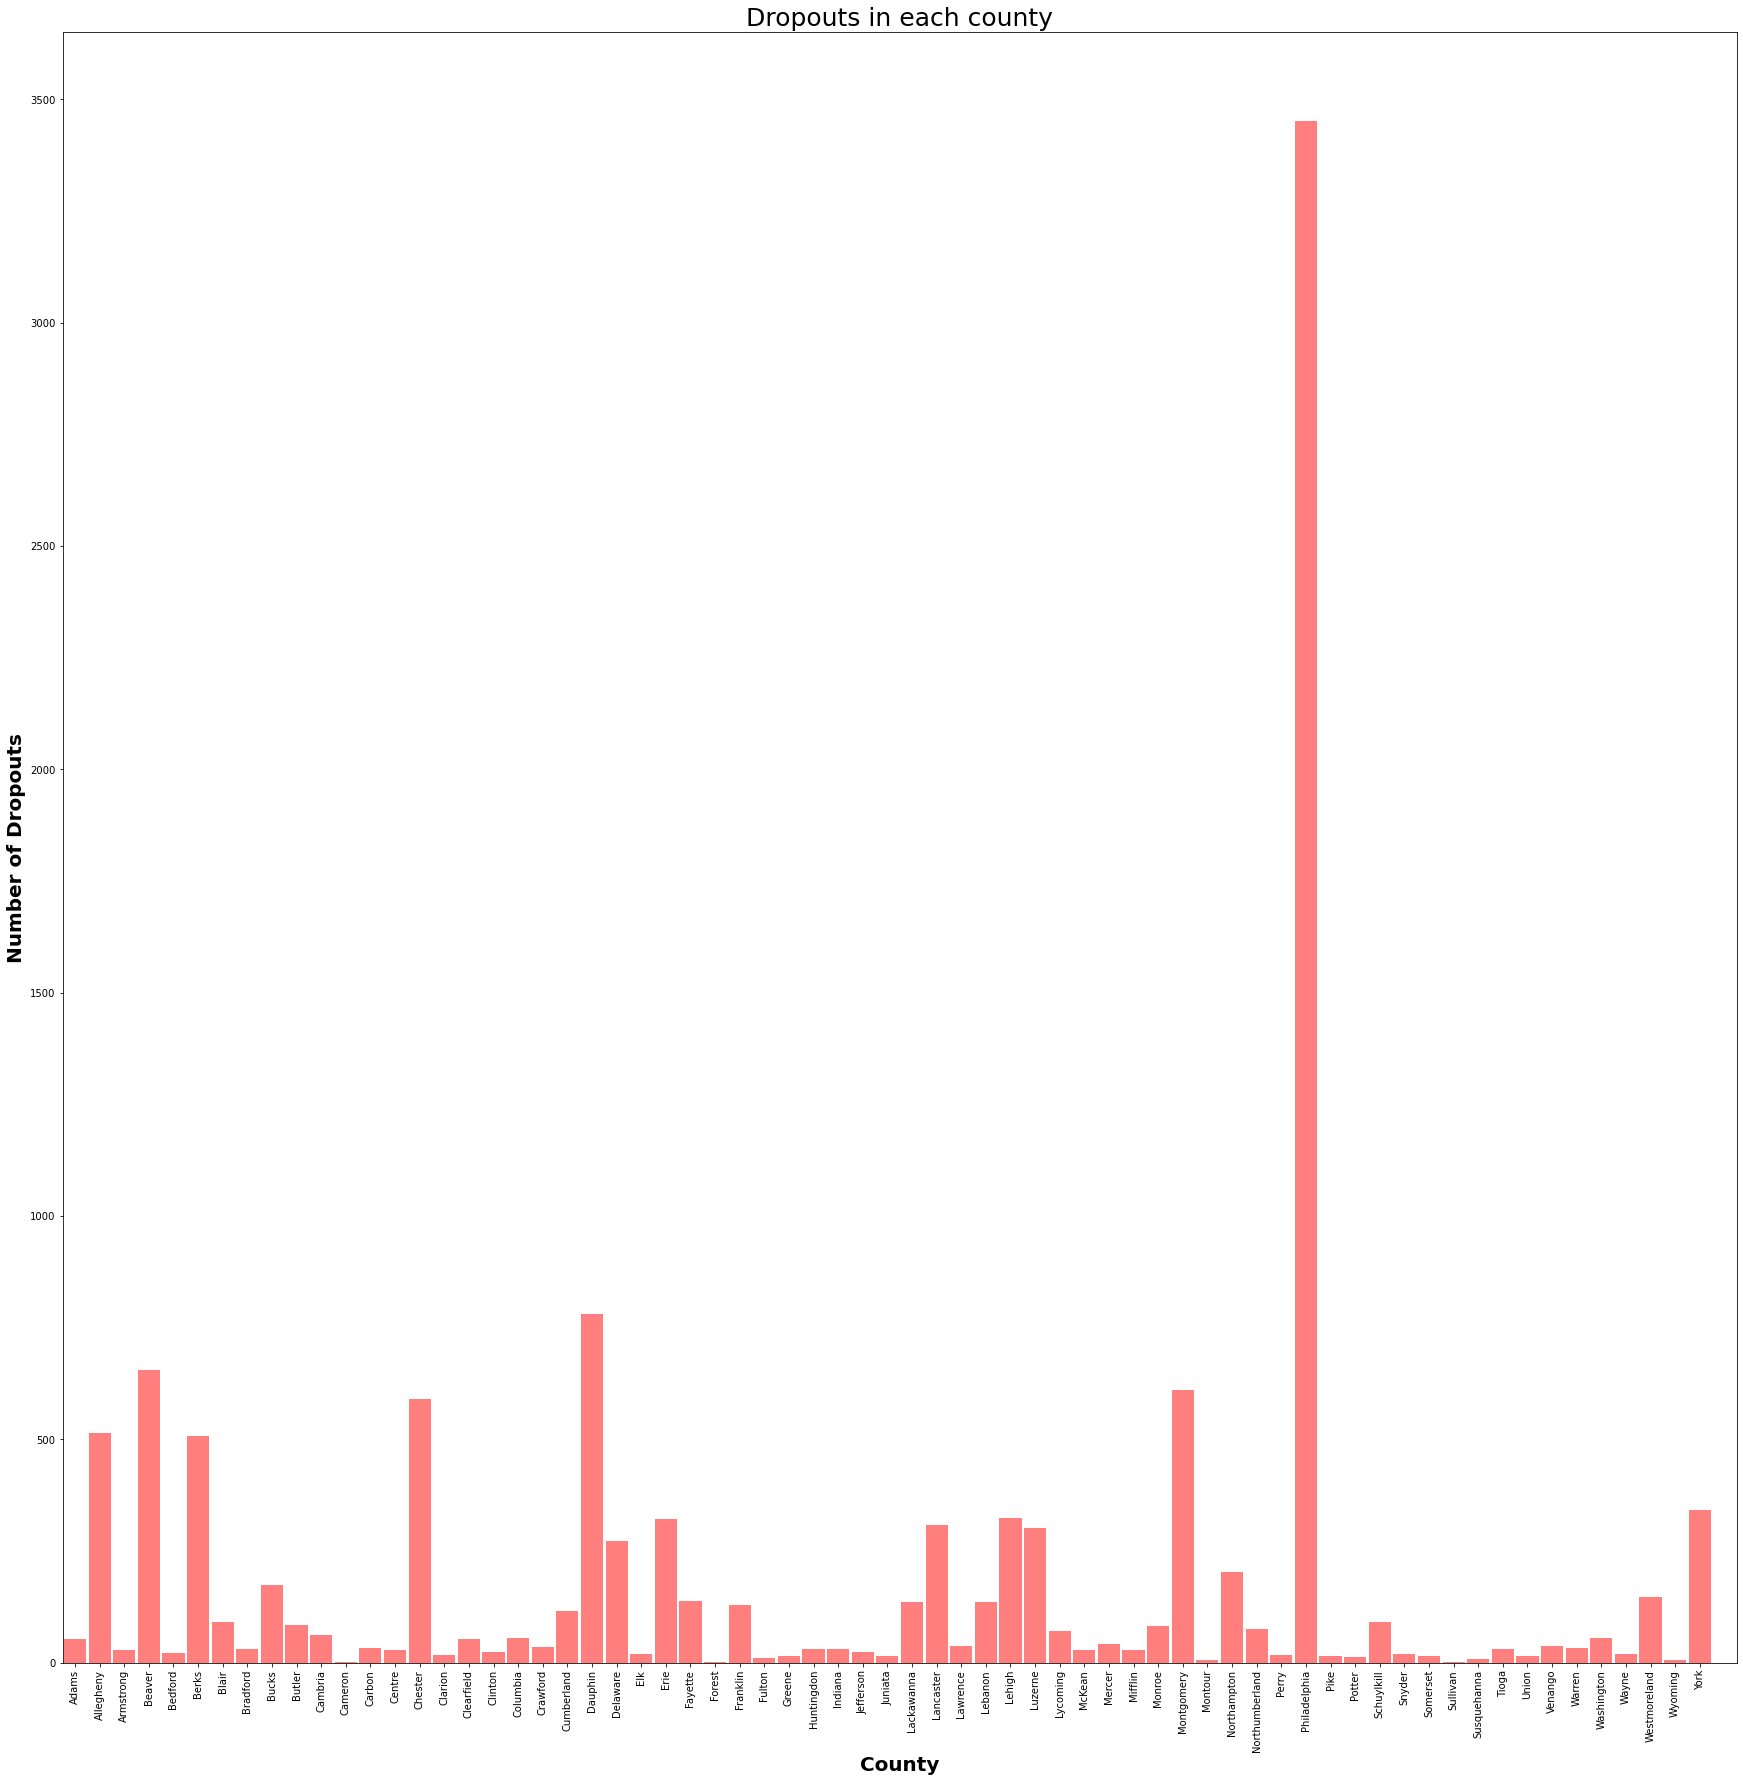

In [15]:
#as a baseline, show a scatterplot of number of dropouts per county
y = visual_df['Dropouts']
x = np.arange(len(visual_df['County']))

#large figsize to show the smaller number
fig, ax = plt.subplots(figsize =(30, 30))
plt.bar(x, y, color='r', width=0.9, alpha=0.5)
plt.xlim(-0.5, len(x)+0.5)
plt.ylim(0, max(y)+200)

plt.title("Dropouts in each county", fontsize = 25)
plt.xlabel('County', fontweight ='bold', fontsize = 20)
plt.ylabel('Number of Dropouts', fontweight ='bold', fontsize = 20)
plt.xticks(ticks = np.arange(67) , labels = label, rotation=90)
plt.savefig("../Dropout_data/dropouts_counties.png")

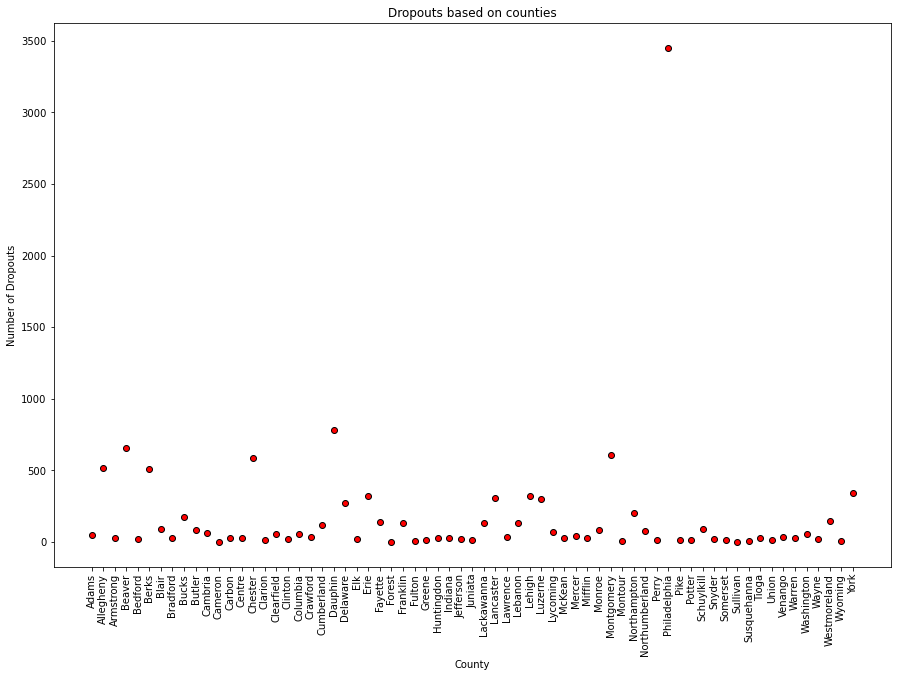

In [16]:
x = visual_df['County']
y = visual_df['Dropouts']

#plot a scatter of the number of dropouts per county
plt.figure(figsize=(15, 10))
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")

plt.title("Dropouts based on counties")
plt.xlabel("County")
plt.ylabel("Number of Dropouts")
plt.xticks(ticks = np.arange(67) , labels = label, rotation=90)
plt.savefig("../Dropout_data/dropouts_counties_scatter.png")

In [17]:
#alternate view of the same plot
# visual_df.plot(kind="scatter", x="County", y="Dropouts", grid=True, figsize=(15,15), rot = 90,
#               title="Dropouts based on counties")
# plt.show()

What is the relationship between alcohol sales and high school dropout rates per county?

In [18]:
#reading in the sales data csv
file = '../Data Sources/compiled_sales_2018_to_2020.csv'
read_sales_df = pd.read_csv(file)

read_sales_df.head()

,County,2017-2018 Year Total ($),2018-2019 Year Total ($),2019-2020 Year Total ($)
0,Adams,5974649.0,6087119.0,5474672.0
1,Allegheny,287446445.0,297562217.0,282457996.0
2,Armstrong,4119789.0,4100004.0,3946644.0
3,Beaver,20662151.0,21929547.0,21044165.0
4,Bedford,3794119.0,3777616.0,3624763.0


In [19]:
#select data for the 2019-2020 year
sales_2019_df = read_sales_df[['County','2019-2020 Year Total ($)']]
sales_2019_df

,County,2019-2020 Year Total ($)
0,Adams,5474672.0
1,Allegheny,282457996.0
2,Armstrong,3946644.0
3,Beaver,21044165.0
4,Bedford,3624763.0
...,...,...
62,Washington,26798762.0
63,Wayne,12246352.0
64,Westmoreland,60414024.0
65,Wyoming,3026001.0


In [20]:

#Note: sales data starts in July of 2019 and ends in June of 2020 (12 months), create an average column

#sales_2019_df.insert(2, "Average ($)", " ", True )
sales_2019_df

,County,2019-2020 Year Total ($)
0,Adams,5474672.0
1,Allegheny,282457996.0
2,Armstrong,3946644.0
3,Beaver,21044165.0
4,Bedford,3624763.0
...,...,...
62,Washington,26798762.0
63,Wayne,12246352.0
64,Westmoreland,60414024.0
65,Wyoming,3026001.0


In [21]:
# since filtering the sales data based on months is not possible (limitation), 
# matching the time frame of sales data (12 months) with dropout data (8 months)
Average = ((sales_2019_df['2019-2020 Year Total ($)'])/12)*8
Average

0     3.649781e+06
1     1.883053e+08
2     2.631096e+06
3     1.402944e+07
4     2.416509e+06
          ...     
62    1.786584e+07
63    8.164235e+06
64    4.027602e+07
65    2.017334e+06
66    3.731000e+07
Name: 2019-2020 Year Total ($), Length: 67, dtype: float64

In [22]:
# entering the average data above into the dataframe
sales_2019_df['Average ($)'] = Average
sales_2019_df

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,2019-2020 Year Total ($),Average ($)
0,Adams,5474672.0,3.649781e+06
1,Allegheny,282457996.0,1.883053e+08
2,Armstrong,3946644.0,2.631096e+06
3,Beaver,21044165.0,1.402944e+07
4,Bedford,3624763.0,2.416509e+06
...,...,...,...
62,Washington,26798762.0,1.786584e+07
63,Wayne,12246352.0,8.164235e+06
64,Westmoreland,60414024.0,4.027602e+07
65,Wyoming,3026001.0,2.017334e+06


In [23]:
# bringing both the data sets into one dataframe
combined_df = pd.merge(left=sales_2019_df, right=visual_df, how='left', left_on='County', right_on='County')
combined_df

,County,2019-2020 Year Total ($),Average ($),index,Dropouts,Dropout Rate
0,Adams,5474672.0,3.649781e+06,0,52.0,0.833333
1,Allegheny,282457996.0,1.883053e+08,1,514.0,1.304518
2,Armstrong,3946644.0,2.631096e+06,2,28.0,3.490769
3,Beaver,21044165.0,1.402944e+07,3,655.0,1.258108
4,Bedford,3624763.0,2.416509e+06,4,21.0,0.419167
...,...,...,...,...,...,...
62,Washington,26798762.0,1.786584e+07,63,55.0,0.648286
63,Wayne,12246352.0,8.164235e+06,64,20.0,0.418750
64,Westmoreland,60414024.0,4.027602e+07,65,147.0,1.127115
65,Wyoming,3026001.0,2.017334e+06,66,5.0,0.187500


In [24]:
combined_df.drop(columns = ['index'],inplace = True)
combined_df

,County,2019-2020 Year Total ($),Average ($),Dropouts,Dropout Rate
0,Adams,5474672.0,3.649781e+06,52.0,0.833333
1,Allegheny,282457996.0,1.883053e+08,514.0,1.304518
2,Armstrong,3946644.0,2.631096e+06,28.0,3.490769
3,Beaver,21044165.0,1.402944e+07,655.0,1.258108
4,Bedford,3624763.0,2.416509e+06,21.0,0.419167
...,...,...,...,...,...
62,Washington,26798762.0,1.786584e+07,55.0,0.648286
63,Wayne,12246352.0,8.164235e+06,20.0,0.418750
64,Westmoreland,60414024.0,4.027602e+07,147.0,1.127115
65,Wyoming,3026001.0,2.017334e+06,5.0,0.187500


The r-squared is: 0.028374550970866105


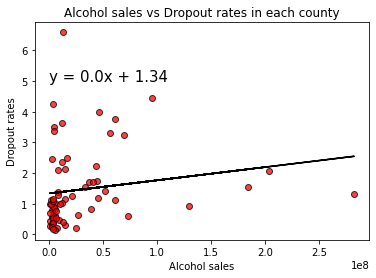

In [25]:
#compare sales and rate
x = combined_df['2019-2020 Year Total ($)']
y = combined_df['Dropout Rate']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,5),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

plt.title("Alcohol sales vs Dropout rates in each county")
plt.xlabel("Alcohol sales ($)")
plt.ylabel("Dropout rates")
plt.savefig("../Dropout_data/sales_v_dropoutrates.png")

The r-squared is: 0.028374550970866087


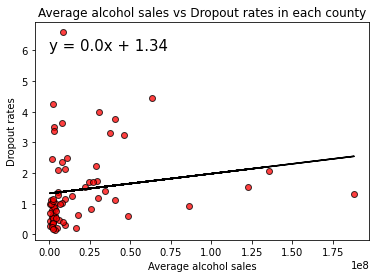

In [26]:
#compare average and rate
x = combined_df['Average ($)']
y = combined_df['Dropout Rate']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,6),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

plt.title("Average alcohol sales vs Dropout rates in each county")
plt.xlabel("Average alcohol sales ($)")
plt.ylabel("Dropout rates")
plt.savefig("../Dropout_data/avgsales_v_dropoutrates.png")

The r-squared is: 0.40401610050935177


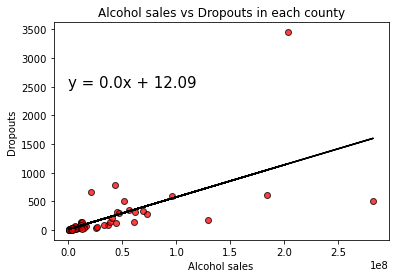

In [27]:
#compare sales and dropouts
#limitation: alcohol sales 2019-2020 starts in july and ends in june. However, dropouts start in the month of October and end in June.
x = combined_df['2019-2020 Year Total ($)']
y = combined_df['Dropouts']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(x,regress_values,"k-")
plt.annotate(line_eq,(2.0,2500),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")


plt.title("Alcohol sales vs Dropouts in each county")
plt.xlabel("Alcohol sales ($)")
plt.ylabel("Dropouts")
plt.savefig("../Dropout_data/sales_v_dropouts.png")

H0: Alcohol sales have no effect on high-school dropouts
Ha: Alcohol sales have an effect on high-school dropouts

In [28]:
#sales
data1 = combined_df['2019-2020 Year Total ($)']
#dropouts
data2 = combined_df['Dropouts']

In [29]:
stats.ttest_ind(data1, data2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=4.701018588488568, pvalue=1.3622512702960749e-05)

In [30]:
#since pvalue < 0.025, you can infer that the null hypothesis is false and should be rejected. 
#Therefore, alcohol sales have an effect on high-school dropouts.

# Alcohol-Related Crash Data

In [31]:
#read in crash data csv files

statewide_crash_df = pd.read_csv("../Crash_Data/Crash_2020_Statewide.csv")
flag_crash_df = pd.read_csv("../Crash_Data/FLAG_2020_Statewide.csv")
counties_df = pd.read_csv("../Crash_Data_2019/county.csv")

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
#create new dataframes with only relevant columns
statewide_cleaned_df = statewide_crash_df[["CRN", "COUNTY", "CRASH_MONTH", "DEC_LAT", "DEC_LONG", "FATAL_COUNT"]]
flag_cleaned_df = flag_crash_df[["CRN", "ALCOHOL_RELATED", "DRINKING_DRIVER", "UNDERAGE_DRNK_DRV"]]


In [33]:
#merge together these dataframes

merged_crash_df = pd.merge(statewide_cleaned_df, flag_cleaned_df, on="CRN",how="outer")

In [34]:
#drop rows with crashes not alcohol-related
zero = [0]
alcohol_related_df = merged_crash_df[merged_crash_df["ALCOHOL_RELATED"].isin(zero)==False]

In [35]:
#rename column before merge

counties_df.rename(columns={"COUNTY ID": "COUNTY"}, inplace=True)


In [36]:
#merge alcohol_related_df with counties_df to add County Name

dui_df = alcohol_related_df.merge(counties_df, how="left", on="COUNTY")

In [37]:
dui_df.head()

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV,COUNTY NAME
0,2020000006,39,1,40.5393,-75.4889,0,1,1,0,LEHIGH
1,2020000013,14,1,40.7812,-77.8521,0,1,1,1,CENTRE
2,2020000014,2,1,40.4806,-79.9423,0,1,1,0,ALLEGHENY
3,2020000016,2,1,40.4426,-80.0297,0,1,1,0,ALLEGHENY
4,2020000034,9,1,40.2173,-74.7816,0,1,1,0,BUCKS


In [38]:
# read in 2019 CSV data
statewide_2019 = pd.read_csv("../Crash_Data_2019/Crash_2019_Statewide.csv")
flag_2019 = pd.read_csv("../Crash_Data_2019/FLAG_2019_Statewide.csv")


In [39]:
#remove unneeded columns from dataframes

statewide_cleaned = statewide_2019[["CRN", "COUNTY", "CRASH_MONTH", "DEC_LAT", "DEC_LONG", "FATAL_COUNT"]]
flag_cleaned = flag_2019[["CRN", "ALCOHOL_RELATED", "DRINKING_DRIVER", "UNDERAGE_DRNK_DRV"]]

In [47]:
#merge the statewide and flag dataframes
merged_df_19 = pd.merge(statewide_cleaned, flag_cleaned, on="CRN",how="outer")

In [48]:
merged_df_19

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV
0,2019124876,21.0,11.0,40.2036,-77.3515,1.0,0.0,0.0,0.0
1,2019077291,37.0,7.0,40.9998,-80.3209,0.0,0.0,0.0,0.0
2,2019074121,62.0,7.0,40.1531,-80.2012,0.0,0.0,0.0,0.0
3,2020008628,67.0,5.0,39.9586,-75.1683,0.0,0.0,0.0,0.0
4,2019088646,29.0,9.0,40.0343,-77.9084,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
125268,2019127618,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
125269,2019095270,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
125270,2019128562,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
125271,2019093183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [54]:
#remove rows with data on crashes not related to alcohol

zero = [0]
alcohol_related_19 = merged_df_19[merged_df_19["ALCOHOL_RELATED"].isin(zero)==False]

In [55]:
alcohol_related_19

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV
7,2020051395,22.0,8.0,40.2853,-76.7057,0.0,1.0,1.0,0.0
12,2020061721,11.0,7.0,40.4416,-78.8916,0.0,1.0,1.0,0.0
14,2019005958,25.0,1.0,41.8799,-80.2201,0.0,1.0,1.0,0.0
16,2019014882,21.0,1.0,40.1555,-77.1958,1.0,1.0,0.0,0.0
19,2019049811,17.0,4.0,40.9779,-78.5027,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
125219,2019122846,62.0,11.0,40.3843,-80.4226,0.0,1.0,1.0,0.0
125237,2019129541,28.0,11.0,39.9053,-77.6722,0.0,1.0,1.0,0.0
125245,2019132420,37.0,12.0,40.9990,-80.3349,0.0,1.0,1.0,0.0
125252,2019132209,7.0,12.0,40.4706,-78.3994,0.0,1.0,0.0,0.0


In [56]:
#merge alcohol_related_df with counties_df to add County Name

dui_2019 = alcohol_related_19.merge(counties_df, how="left", on="COUNTY")
dui_2019

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV,COUNTY NAME
0,2020051395,22.0,8.0,40.2853,-76.7057,0.0,1.0,1.0,0.0,DAUPHIN
1,2020061721,11.0,7.0,40.4416,-78.8916,0.0,1.0,1.0,0.0,CAMBRIA
2,2019005958,25.0,1.0,41.8799,-80.2201,0.0,1.0,1.0,0.0,ERIE
3,2019014882,21.0,1.0,40.1555,-77.1958,1.0,1.0,0.0,0.0,CUMBERLAND
4,2019049811,17.0,4.0,40.9779,-78.5027,1.0,1.0,1.0,0.0,CLEARFIELD
...,...,...,...,...,...,...,...,...,...,...
9285,2019122846,62.0,11.0,40.3843,-80.4226,0.0,1.0,1.0,0.0,WASHINGTON
9286,2019129541,28.0,11.0,39.9053,-77.6722,0.0,1.0,1.0,0.0,FRANKLIN
9287,2019132420,37.0,12.0,40.9990,-80.3349,0.0,1.0,1.0,0.0,LAWRENCE
9288,2019132209,7.0,12.0,40.4706,-78.3994,0.0,1.0,0.0,0.0,BLAIR


In [44]:
# read in CSV data
statewide_2018 = pd.read_csv("../setup_files/CRASH_2018.csv")
flag_2018 = pd.read_csv("../setup_files/FLAG_2018.csv")

In [45]:
#remove unneeded columns from statewide data

statewide_cleaned_18 = statewide_2018[["CRN", "COUNTY", "CRASH_MONTH", "DEC_LAT", "DEC_LONG", "FATAL_COUNT"]]

#clean flag data frame
flag_cleaned_18 = flag_2018[["CRN", "ALCOHOL_RELATED", "DRINKING_DRIVER", "UNDERAGE_DRNK_DRV"]]

In [46]:
#merge the statewide and flag dataframes
merged_df_18 = pd.merge(statewide_cleaned_18, flag_cleaned_18, on="CRN",how="outer")

In [57]:
#remove rows with data on crashes not related to alcohol

zero = [0]
alcohol_related_18 = merged_df_18[merged_df_18["ALCOHOL_RELATED"].isin(zero)==False]

In [58]:
#merge alcohol_related_df with counties_df to add County Name

dui_2018 = alcohol_related_18.merge(counties_df, how="left", on="COUNTY")
dui_2018

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV,COUNTY NAME
0,2019131904,42,12,41.9904,-78.2790,0,1,1,1,MCKEAN
1,2020048956,39,5,40.5601,-75.4446,0,1,1,0,LEHIGH
2,2018124693,10,10,41.1393,-79.7424,0,1,1,0,BUTLER
3,2018000024,9,1,40.2229,-75.0711,0,1,1,0,BUCKS
4,2018000006,64,1,40.3036,-79.7402,0,1,1,0,WESTMORELAND
...,...,...,...,...,...,...,...,...,...,...
9808,2019076365,25,2,42.1124,-80.0391,0,1,1,0,ERIE
9809,2019076847,67,3,39.9569,-75.1979,0,1,1,0,PHILADELPHIA
9810,2019079455,6,11,40.2483,-75.6979,0,1,1,0,BERKS
9811,2019081283,67,8,39.9408,-75.1575,0,1,1,0,PHILADELPHIA


In [59]:
crash_2019_int = dui_2019.copy()
crash_2020_df = dui_df.copy()
#read in csv data on alcohol related crashes in PA in 2018
crash_2018_df = dui_2018.copy()

In [60]:
#fill nan values with 0
crash_2019_int["COUNTY"].fillna(0,inplace=True)
crash_2019_int["CRASH_MONTH"].fillna(0,inplace=True)

In [63]:
#convert data types as needed
crash_2019_int["CRASH_MONTH"].astype(int)
crash_2019_int["COUNTY"] = crash_2019_int["COUNTY"].astype(int)
crash_2019_int["CRASH_MONTH"] = crash_2019_int["CRASH_MONTH"].astype(int)
crash_2019_int["CRASH_MONTH"] = crash_2019_int["CRASH_MONTH"].astype(int)

In [64]:
#create an aggregate dataframe and reset the index
aggregate_2020 = crash_2020_df.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()
aggregate_2020.reset_index(inplace=True)

In [65]:
jan_jun_20 = aggregate_2020[(aggregate_2020["CRASH_MONTH"] >= 1) & (aggregate_2020["CRASH_MONTH"] <= 6)]

In [66]:
#create copies to work with
crashes_2018 = crash_2018_df.copy()
crashes_2019 = crash_2019_int.copy()

In [67]:
aggregate_2019_b = crashes_2019.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()
aggregate_2019_b.reset_index(inplace=True)

In [68]:
jul_dec_19 = aggregate_2019_b[(aggregate_2019_b["CRASH_MONTH"] >=7)]
jan_jun_19 = aggregate_2019_b[(aggregate_2019_b["CRASH_MONTH"] >=1) & (aggregate_2019_b["CRASH_MONTH"] <= 6)]


In [69]:
aggregate_2018 = crashes_2018.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()
aggregate_2018.reset_index(inplace=True)

In [70]:
jul_dec_18 = aggregate_2018[(aggregate_2018["CRASH_MONTH"] >=7)]

In [71]:
#create fiscal year dataframes
fiscal_18_19 = pd.concat([jul_dec_18, jan_jun_19])
fiscal_19_20 = pd.concat([jul_dec_19, jan_jun_20])

In [72]:
alcohol_sales_df = pd.read_csv("../Data Sources/compiled_sales_2018_to_2020.csv")

In [73]:

# find totals

total_18_19 = fiscal_18_19.groupby("COUNTY NAME").sum()["ALCOHOL_RELATED"]

sales_18_19 = alcohol_sales_df.groupby("County").mean()["2018-2019 Year Total ($)"]

In [75]:
#calculate linear regression for 2018-219 dui crashes and alcohol sales
pearson_18_19 = stats.pearsonr(total_18_19,sales_18_19)
print(f"For 2018-19 dui crashes and alcohol sales the Pearson r value is {pearson_18_19[0]} and the Pearson p value is {pearson_18_19[1]}")
print(f"The 2018-19 r-squared value is {pearson_18_19[0]*pearson_18_19[0]}")

(slope_18_19, intercept_18_19, rvalue_18_19, pvalue_18_19, stderr_18_19) = linregress(total_18_19,sales_18_19)

regress_values_18_19 = (total_18_19 * slope_18_19 + intercept_18_19)

equation_18_19 = "y = "+str(round(slope_18_19,2))+"x+" +str(round(intercept_18_19,2))

regress_values_18_19

For 2018-19 dui crashes and alcohol sales the Pearson r value is 0.9366404960132564 and the Pearson p value is 2.5663349127281006e-31
The 2018-19 r-squared value is 0.8772954187719589


COUNTY NAME
ADAMS           1.492139e+07
ALLEGHENY       2.955407e+08
ARMSTRONG       1.310312e+07
BEAVER          3.189189e+07
BEDFORD         6.436140e+06
                    ...     
WASHINGTON      5.068066e+07
WAYNE           2.496560e+06
WESTMORELAND    8.553079e+07
WYOMING        -8.369314e+05
YORK            1.179566e+08
Name: ALCOHOL_RELATED, Length: 67, dtype: float64

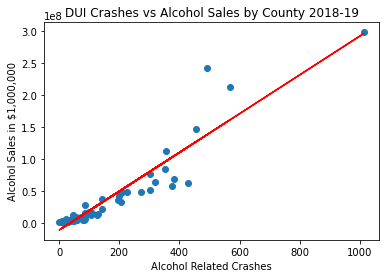

In [76]:

#create a scatter plot

plt.scatter(total_18_19 , sales_18_19)
plt.xlabel("Alcohol Related Crashes")
plt.ylabel("Alcohol Sales in $1,000,000")
plt.title("DUI Crashes vs Alcohol Sales by County 2018-19")
plt.plot(total_18_19, regress_values_18_19, "r-")
#plt.annotate(equation_18_19,(3,3),color="r")
plt.savefig('crashes_sales_18_19.png')
plt.show()

In [77]:
# find totals

total_19_20 = fiscal_19_20.groupby("COUNTY NAME").sum()["ALCOHOL_RELATED"]

sales_19_20 = alcohol_sales_df.groupby("County").mean()["2019-2020 Year Total ($)"]

In [79]:
#calculate linear regression for 2019-20 dui crashes and alcohol sales
pearson_19_20 = stats.pearsonr(total_19_20,sales_19_20)
print(f"For 2019-20 dui crashes and alcohol sales the Pearson r value is {pearson_19_20[0]} and the Pearson p value is {pearson_19_20[1]}")
print(f"The 2019-20 r-squared value is {pearson_19_20[0]*pearson_19_20[0]}")

(slope_19_20, intercept_19_20, rvalue_19_20, pvalue_19_20, stderr_19_20) = linregress(total_19_20,sales_19_20)

regress_values_19_20 = (total_19_20 * slope_19_20 + intercept_19_20)

equation_19_20 = "y = "+str(round(slope_19_20,2))+"x+" +str(round(intercept_19_20,2))

regress_values_19_20

For 2019-20 dui crashes and alcohol sales the Pearson r value is 0.9539609058481805 and the Pearson p value is 1.0472004734032858e-35
The 2019-20 r-squared value is 0.9100414098866811


COUNTY NAME
ADAMS           1.195280e+07
ALLEGHENY       2.784279e+08
ARMSTRONG       9.090900e+06
BEAVER          2.658032e+07
BEDFORD         1.871970e+05
                    ...     
WASHINGTON      5.170148e+07
WAYNE           2.095133e+06
WESTMORELAND    7.332476e+07
WYOMING        -2.038729e+06
YORK            8.731629e+07
Name: ALCOHOL_RELATED, Length: 67, dtype: float64

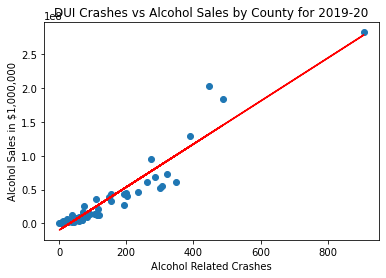

In [80]:

#create a scatter plot

plt.scatter(total_19_20 , sales_19_20)
plt.xlabel("Alcohol Related Crashes")
plt.ylabel("Alcohol Sales in $1,000,000")
plt.title("DUI Crashes vs Alcohol Sales by County for 2019-20")
plt.plot(total_19_20, regress_values_19_20, "r-")
plt.savefig('crashes_sales_19_20.png')
plt.show()

In [81]:
# read in population by county data
population_df = pd.read_csv("../setup_files/pop_data.csv")

In [82]:
#drop row with null values
population_df.dropna(inplace=True)

In [83]:
pop_df = population_df.copy()

#remove . from County column

pop_df["County"] = pop_df["County"].str.split(".").str[1]

In [84]:
#remove ,Pennsylvania from County column

pop_df["County"] = pop_df["County"].str.split(",").str[0]

In [85]:
collective_df = pd.DataFrame({"County" : alcohol_sales_df["County"], "Population 2018": pop_df["2018"],
                              "Population 2019": pop_df["2019"], "Alcohol Sales 2018-2019": alcohol_sales_df["2018-2019 Year Total ($)"], 
                              "Alcohol Sales 2019-2020": alcohol_sales_df["2019-2020 Year Total ($)"], 
                              "Crashes 2018-2019":total_18_19.values,"Crashes 2019-2020":total_19_20.values})
collective_df

,County,Population 2018,Population 2019,Alcohol Sales 2018-2019,Alcohol Sales 2019-2020,Crashes 2018-2019,Crashes 2019-2020
0,Adams,103062.0,103009.0,6087119.0,5474672.0,87.0,69.0
1,Allegheny,1217281.0,1216045.0,297562217.0,282457996.0,1013.0,907.0
2,Armstrong,65352.0,64735.0,4100004.0,3946644.0,81.0,60.0
3,Beaver,164582.0,163929.0,21929547.0,21044165.0,143.0,115.0
4,Bedford,48094.0,47888.0,3777616.0,3624763.0,59.0,32.0
...,...,...,...,...,...,...,...
62,Washington,207018.0,206865.0,32219420.0,26798762.0,205.0,194.0
63,Wayne,51395.0,51361.0,12861710.0,12246352.0,46.0,38.0
64,Westmoreland,350459.0,348899.0,63286292.0,60414024.0,320.0,262.0
65,Wyoming,27087.0,26794.0,2920391.0,3026001.0,35.0,25.0


In [86]:
top_3_population = collective_df.sort_values(by=['Population 2018'], ascending=False)[0:3]
top_3_population

,County,Population 2018,Population 2019,Alcohol Sales 2018-2019,Alcohol Sales 2019-2020,Crashes 2018-2019,Crashes 2019-2020
50,Philadelphia,1583592.0,1584064.0,241305526.0,203173005.0,493.0,447.0
1,Allegheny,1217281.0,1216045.0,297562217.0,282457996.0,1013.0,907.0
45,Montgomery,826924.0,830915.0,212777142.0,184319535.0,569.0,489.0


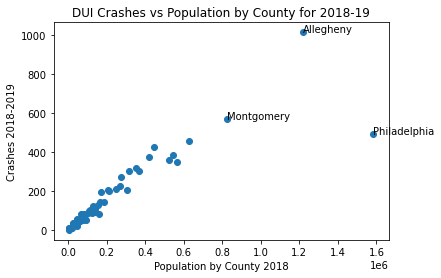

In [87]:
#create a scatter plot

plt.scatter(collective_df["Population 2018"] , total_18_19.values)
plt.xlabel("Population by County 2018")
plt.ylabel("Crashes 2018-2019")
for i in range(3):
    plt.text(top_3_population["Population 2018"].values[i], top_3_population["Crashes 2018-2019"].values[i], top_3_population["County"].values[i])
# plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2019-2020 Fiscal Year")
# plt.plot(total_19_20, regress_values_19_20, "r-")
# plt.savefig('crashes_sales_19_20.png')
plt.title("DUI Crashes vs Population by County for 2018-19")
plt.savefig('crashes_population_18_19.png')
plt.show()

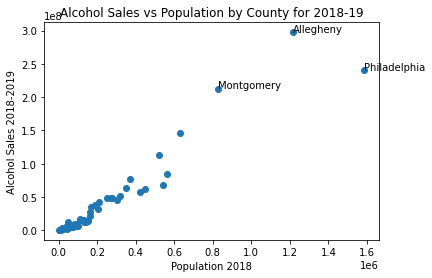

In [88]:
#create a scatter plot

plt.scatter(collective_df["Population 2018"] , collective_df["Alcohol Sales 2018-2019"])
plt.xlabel("Population 2018")
plt.ylabel("Alcohol Sales 2018-2019")
for i in range(3):
    plt.text(top_3_population["Population 2018"].values[i], top_3_population["Alcohol Sales 2018-2019"].values[i], top_3_population["County"].values[i])
# plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2019-2020 Fiscal Year")
# plt.plot(total_19_20, regress_values_19_20, "r-")
# plt.savefig('crashes_sales_19_20.png')
plt.title("Alcohol Sales vs Population by County for 2018-19")
plt.savefig('population_sales_18_19.png')
plt.show()